In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = cv2.imread('cameraman.tif', 0)

In [3]:
# 1. Compute the 2D Fourier Transform and Shift Low Frequencies to the Center
f = np.fft.fft2(image)
f_shift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(f_shift) + 1)  # Log scale for visualization


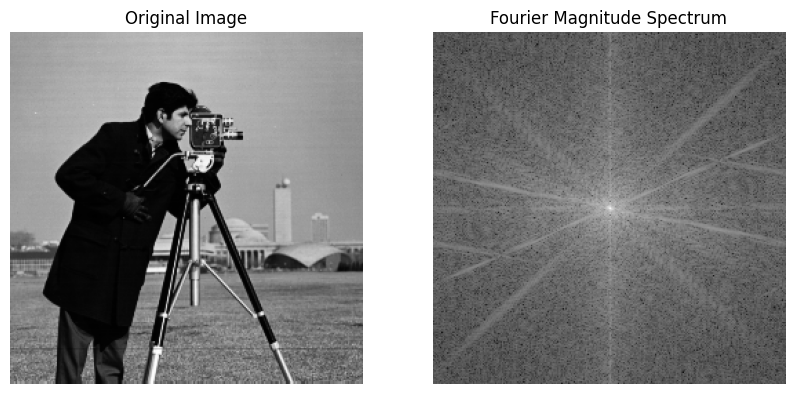

In [4]:
# 2. Show Original and Fourier Transformed Image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Magnitude Spectrum'), plt.axis('off')
plt.show()

In [5]:
# 3. Create an Ideal Low-Pass Filter (ILPF)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
radius = 30  # Cutoff frequency

low_pass_filter = np.zeros((rows, cols), np.uint8)
cv2.circle(low_pass_filter, (ccol, crow), radius, 1, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

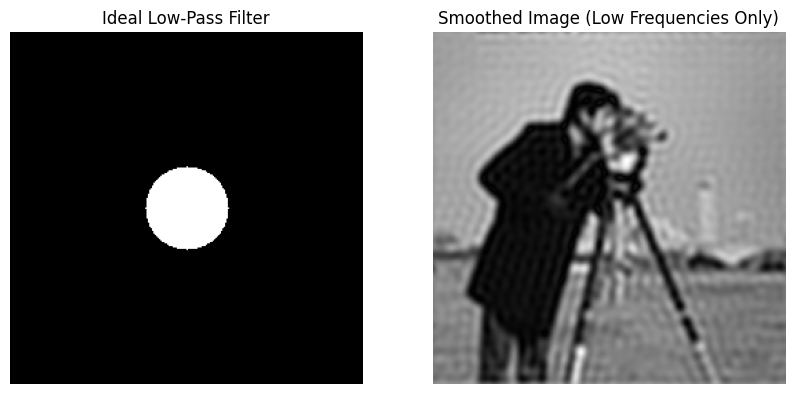

In [6]:
# 4. Apply Low-Pass Filter and Smooth Image
filtered_f_shift = f_shift * low_pass_filter
filtered_f = np.fft.ifftshift(filtered_f_shift)
smoothed_image = np.abs(np.fft.ifft2(filtered_f))

# Show Filtered Image
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(low_pass_filter, cmap='gray')
plt.title('Ideal Low-Pass Filter'), plt.axis('off')
plt.subplot(122), plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Low Frequencies Only)'), plt.axis('off')
plt.show()


In [7]:
# 5. Justification: High-frequency components are removed as the image becomes smoother.
# 6. Decentralize Low-Frequency Components
decentralized_f = np.fft.ifftshift(filtered_f_shift)

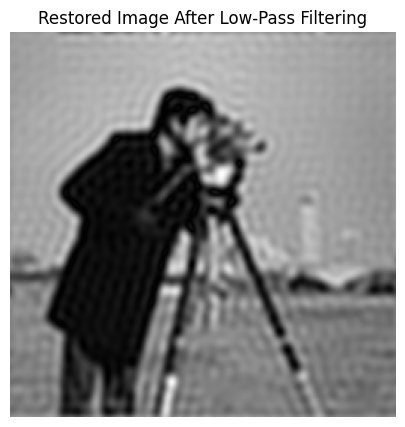

In [8]:
# 7. Apply Inverse Fourier Transform
restored_image = np.abs(np.fft.ifft2(decentralized_f))

plt.figure(figsize=(10, 5))
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image After Low-Pass Filtering')
plt.axis('off')
plt.show()

In [9]:
# 8. Create an Ideal High-Pass Filter (IHPF)
high_pass_filter = 1 - low_pass_filter  # Inverse of the low-pass filter 

In [10]:
# 9. Apply High-Pass Filter to Detect Edges
filtered_f_shift_hp = f_shift * high_pass_filter
filtered_f_hp = np.fft.ifftshift(filtered_f_shift_hp)
edges_image = np.abs(np.fft.ifft2(filtered_f_hp))

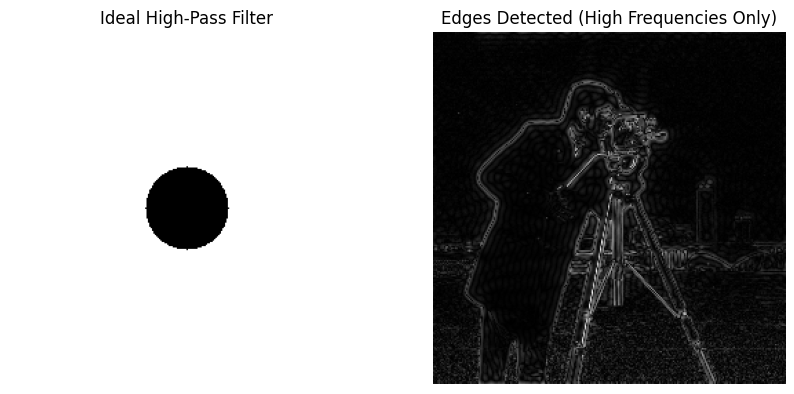

In [11]:
# Show High-Pass Filtered Image (Edges)
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(high_pass_filter, cmap='gray')
plt.title('Ideal High-Pass Filter'), plt.axis('off')
plt.subplot(122), plt.imshow(edges_image, cmap='gray')
plt.title('Edges Detected (High Frequencies Only)'), plt.axis('off')
plt.show()

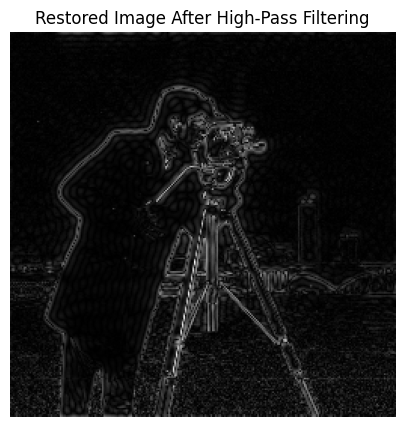

In [12]:
# 10. Decentralize and Apply Inverse Fourier Transform
decentralized_hp = np.fft.ifftshift(filtered_f_shift_hp)
restored_edges_image = np.abs(np.fft.ifft2(decentralized_hp))

plt.figure(figsize=(10, 5))
plt.imshow(restored_edges_image, cmap='gray')
plt.title('Restored Image After High-Pass Filtering')
plt.axis('off')
plt.show() 